In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

# Display Customization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# dataset
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# summary 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Inspection and Data Cleaning

In [6]:
# dulpicate values check
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [7]:
# Null Values check
round(df.isna().sum()/len(df)*100,2)

Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64

In [8]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df.Item_Fat_Content = df.Item_Fat_Content.replace(['LF','low fat'], 'Low Fat')
df.Item_Fat_Content = df.Item_Fat_Content.replace('reg', 'Regular')

In [10]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [11]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
cross_verification = pd.crosstab(df.Outlet_Size, df.Outlet_Type)

In [13]:
cross_verification

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


- From above table, we can see that Grocery store are small and that's true in real life.

In [14]:
cross_verification1 = pd.crosstab(df.Outlet_Size, df.Outlet_Location_Type)

In [15]:
cross_verification1

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0


- All the Tier 2 stores are Small and Grocery Store as seen from the table.
- Also Tier 3 seems to have High Outlet and Tier 1 seems to have medium Outlet.

In [16]:
df[df.Outlet_Size.isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [17]:
d = {'Grocery Store':'Small'}
s = df.Outlet_Type.map(d)

In [18]:
df.Outlet_Size= df.Outlet_Size.combine_first(s)

In [19]:
dic = {"Tier 2":"Small"}
s = df.Outlet_Location_Type.map(dic)
df.Outlet_Size = df.Outlet_Size.combine_first(s)

In [20]:
df.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

In [22]:
df.isnull().sum(axis=0)

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df[df.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [24]:
# List of item types 
item_type_list = df.Item_Type.unique().tolist()
# grouping based on item type and calculating mean of item weight
Item_Type_Means = df.groupby('Item_Type')['Item_Weight'].mean()
# Mapiing Item weight to item type mean
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = df.Item_Type.map(dic)
    df.Item_Weight = df.Item_Weight.combine_first(s)
    
Item_Type_Means = df.groupby('Item_Type')['Item_Weight'].mean() 

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- null values have been taken care of now.

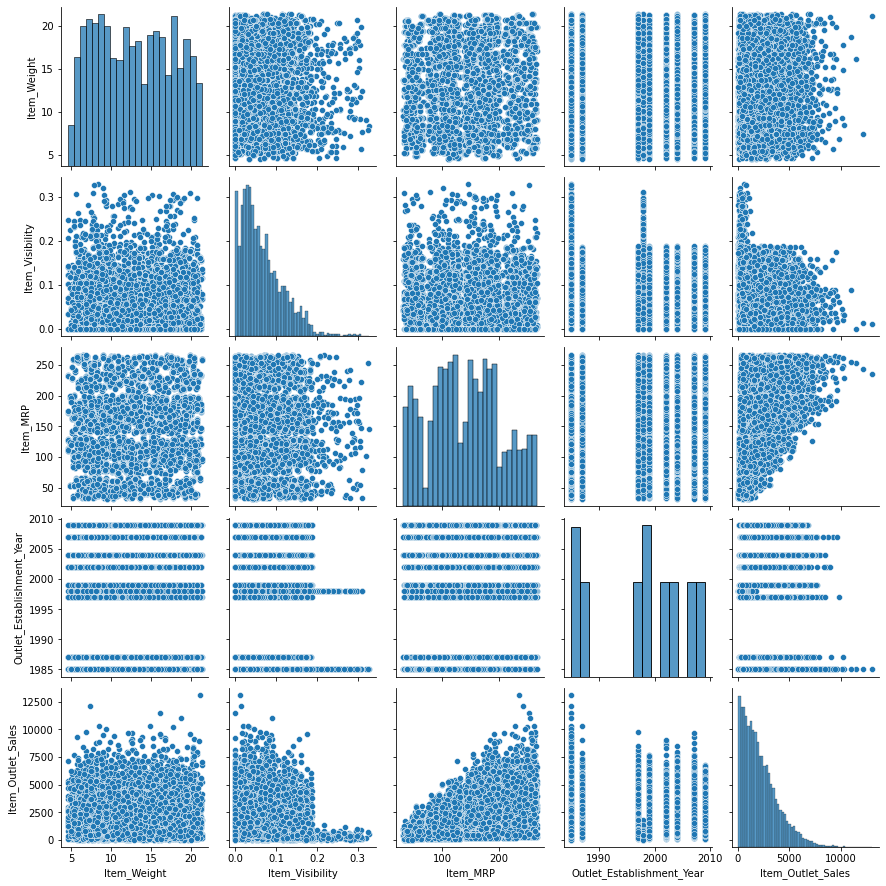

In [26]:
# Visualizing Numerical Variable
sns.pairplot(df)
plt.show()

- Item_Visibility seems to have more zeros. Its strange. 

In [27]:
cat_var = ['Outlet_Identifier','Item_Type','Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type']

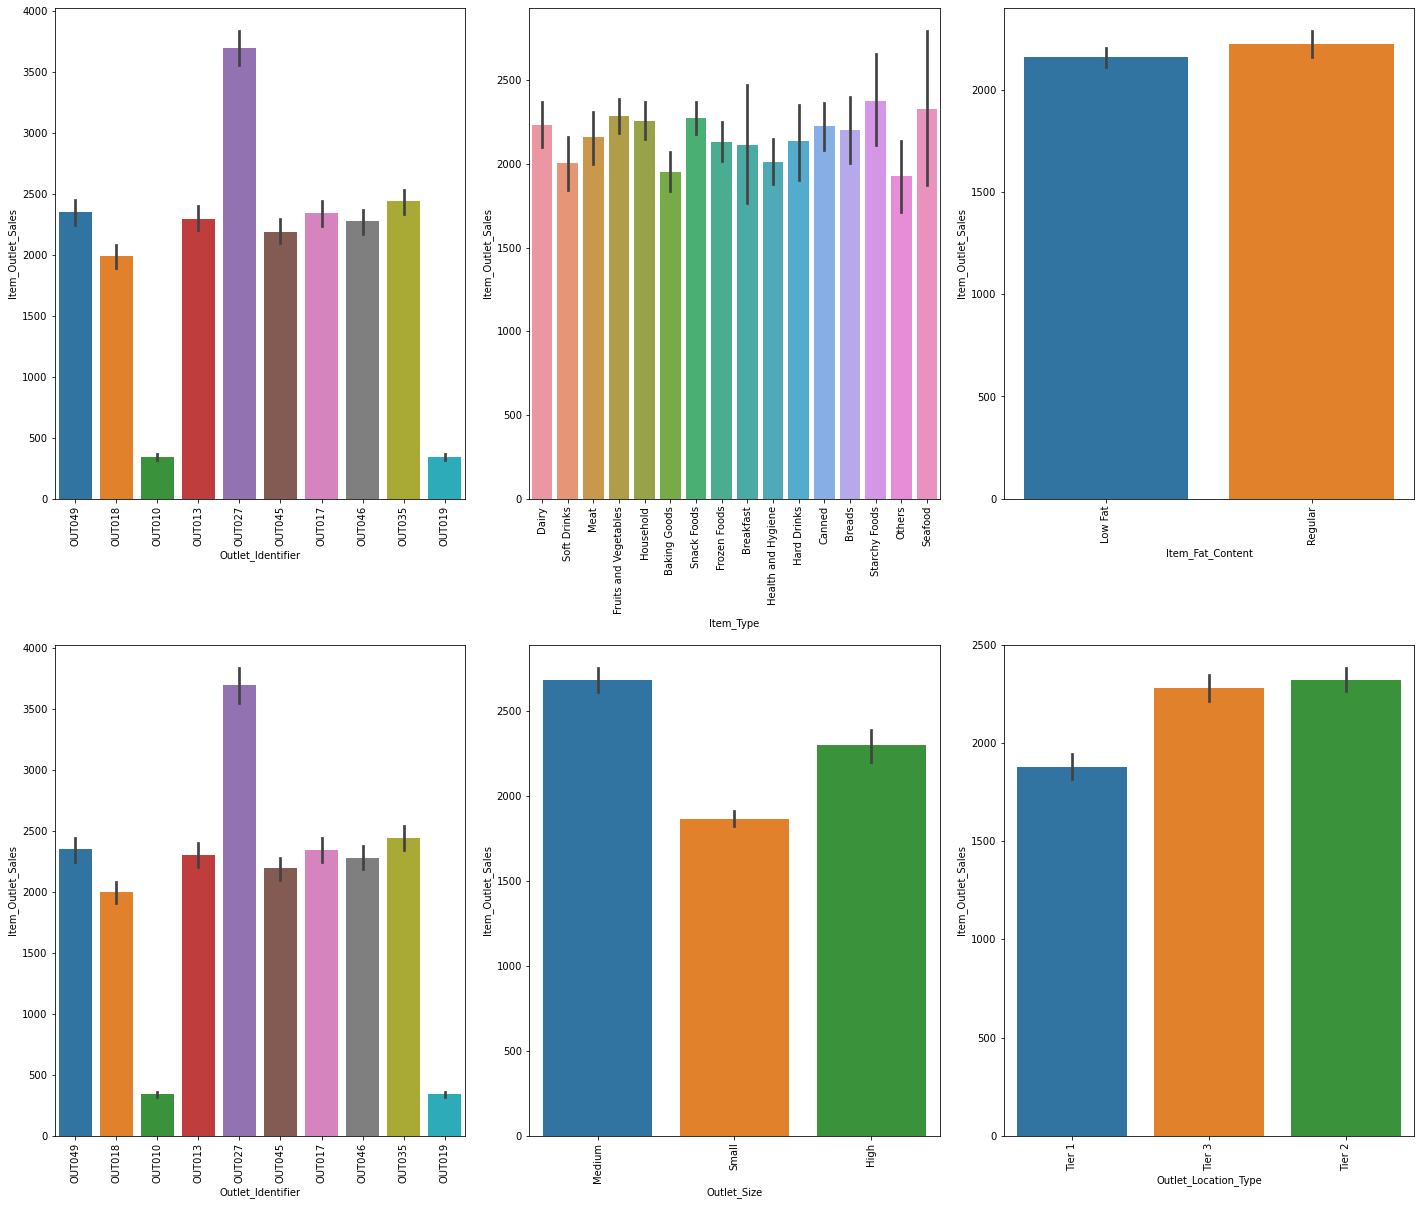

In [28]:
# Visualing categorical Variable 
plt.figure(figsize=(20,17))
for i in enumerate(cat_var):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x = i[1],y='Item_Outlet_Sales',data = df)
    plt.xticks(rotation=90)
sns.set_context('notebook', font_scale=1.27)
plt.tight_layout()
plt.show()

In [29]:
df.Item_Visibility.value_counts().head()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
Name: Item_Visibility, dtype: int64

- 526 item have visibility as zero. This can't be true. So considering these items as null values.

In [30]:
# Replacing 0's with NaN
df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)
# Now fill by mean of visbility based on item identifiers
df.Item_Visibility = df.Item_Visibility.fillna(df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [31]:
df.Outlet_Establishment_Year.max()

2009

In [32]:
df['Outlet_Year'] = 2021 - df.Outlet_Establishment_Year

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34


In [34]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [35]:
var_cat = var_cat.columns.tolist()

In [36]:
var_cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [37]:
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df.Outlet_Identifier)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,9
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,23,0
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,1


In [38]:
for i in var_cat:
    df[i] = le.fit_transform(df[i])

In [39]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,22,9
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,12,3
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,22,9
3,1121,19.20,1,0.022911,6,182.0950,0,1998,2,2,0,732.3800,23,0
4,1297,8.93,0,0.016164,9,53.8614,1,1987,0,2,1,994.7052,34,1


In [40]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Year,Outlet
Item_Identifier,1.000000,0.048266,-0.114660,-0.029149,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869,0.012772,-0.008602
Item_Weight,0.048266,1.000000,-0.026797,-0.021226,0.035710,0.025967,-0.007586,-0.013417,-0.012445,0.002973,0.000592,0.013198,0.013417,-0.007586
Item_Fat_Content,-0.114660,-0.026797,1.000000,0.052620,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719,-0.003151,0.000764
Item_Visibility,-0.029149,-0.021226,0.052620,1.000000,-0.042400,-0.005951,-0.096282,-0.075238,0.090322,-0.030449,-0.170752,-0.126026,0.075238,-0.096282
Item_Type,-0.017973,0.035710,-0.139434,-0.042400,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048,-0.004970,0.001656
Item_MRP,0.012853,0.025967,0.006063,-0.005951,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574,-0.005020,0.003319
Outlet_Identifier,-0.008602,-0.007586,0.000764,-0.096282,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325,-0.079035,1.000000
Outlet_Establishment_Year,-0.012772,-0.013417,0.003151,-0.075238,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135,-1.000000,0.079035
Outlet_Size,0.001229,-0.012445,-0.001262,0.090322,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753,-0.425534,0.260272
Outlet_Location_Type,0.003656,0.002973,-0.001598,-0.030449,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367,0.089216,-0.716176


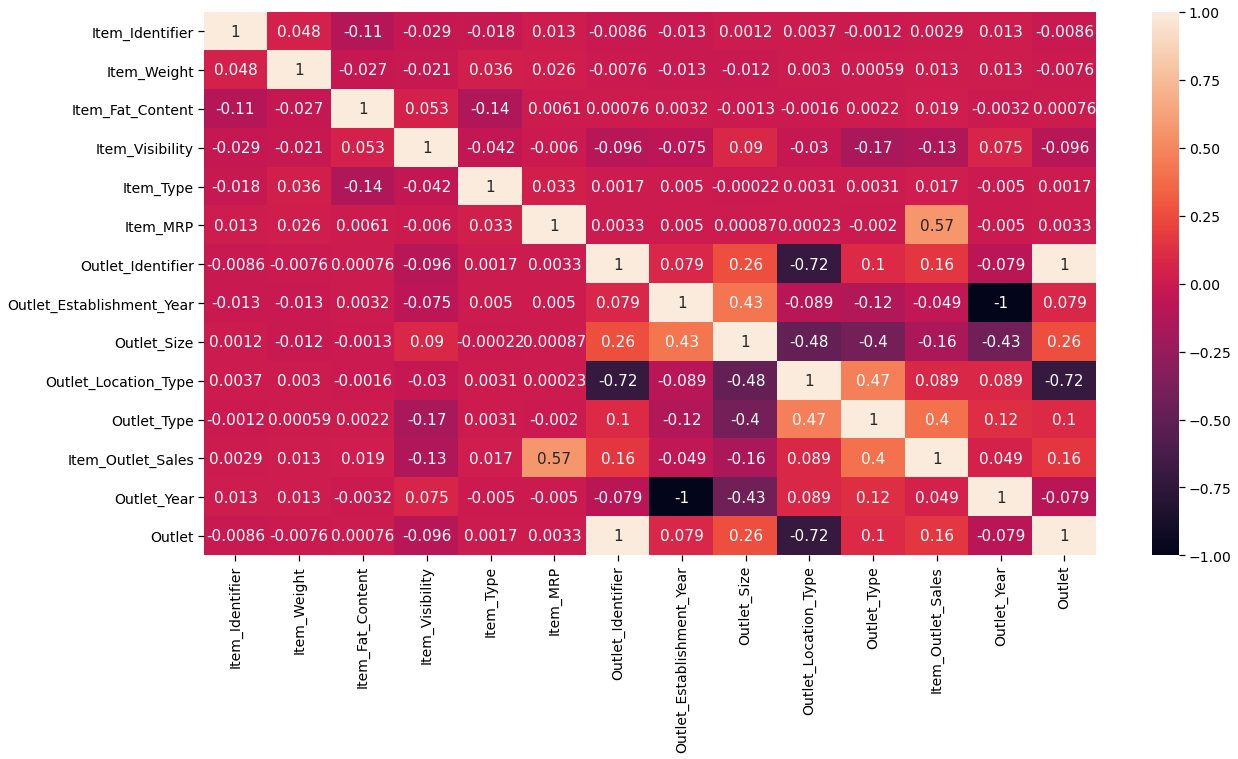

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [42]:
predictors=['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Year','Outlet','Item_Weight']

seed = 240
np.random.seed(seed)
X = df[predictors]
y = df.Item_Outlet_Sales
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item_Weight
0,0,0.016047,4,249.8092,1,0,1,22,9,9.30
1,1,0.019278,14,48.2692,1,2,2,12,3,5.92
2,0,0.016760,10,141.6180,1,0,1,22,9,17.50
3,1,0.022911,6,182.0950,2,2,0,23,0,19.20
4,0,0.016164,9,53.8614,0,2,1,34,1,8.93


In [43]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [45]:
X_train.shape

(6818, 10)

In [46]:
X_test.shape

(1705, 10)

In [47]:
y_train.shape

(6818,)

In [48]:
y_test.shape

(1705,)

# Model Building

In [49]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

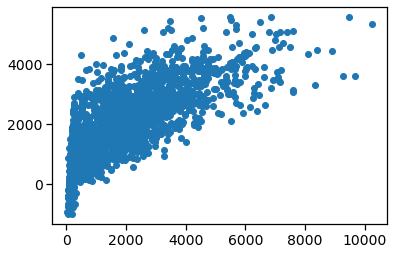

In [50]:
plt.scatter(y_test,predictions)
plt.show()

In [51]:
print("Linear Regression Model Score:",model.score(X_test,y_test))


Linear Regression Model Score: 0.520686271356602


In [52]:
original_values = y_test
rmse = np.sqrt(metrics.mean_squared_error(original_values,predictions))
print("Linear Regression RMSE: ", rmse)

Linear Regression RMSE:  1141.3852841925054


In [53]:
print("Linear Regression R2 score: ",metrics.r2_score(original_values,predictions))

Linear Regression R2 score:  0.520686271356602


In [54]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     677.8
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:05:55   Log-Likelihood:                -58113.
No. Observations:                6818   AIC:                         1.162e+05
Df Residuals:                    6807   BIC:                         1.163e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -829.7799    130.185     -6.374      0.000   -1084.983    -574.577
Item_Fat_Content        68.7130     31.169      2.205      0.028       7.612     129.814
Item_Visibility      -1632.8985    303.457     -5.381      0.000   -2227.768   -1038.029
Item_Type                0.2152      3.552      0.061      0.952      -6.748       7.178
Item_MRP                15.5772      0.236     65.964      0.000      15.114      16.040
Outlet_Size           -150.4426     28.287     -5.318      0.000    -205.894     -94.991
Outlet_Location_Type   -94.3389     42.387     -2.226      0.026    -177.430     -11.248
Outlet_Type            813.6107     30.156     26.980      0.000     754.496     872.725
Outlet_Year              0.0288      1.993      0.014      0.988      -3.879       3.936
Outlet                  60.2972     10.577      5.701      0.000      39.563      81.031
Item_Weight             -2.3791      3.182     -0.748      0.455      -8.617       3.859
==============================================================================
Omnibus:                      647.111   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.419
Skew:                           0.621   Prob(JB):                    1.25e-284
Kurtosis:                       4.749   Cond. No.                     3.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
predictions = results.predict(x)
predictionsDF = pd.DataFrame({"Predictions":predictions})
joined = x.join(predictionsDF)
joined.head()

,const,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Year,Outlet,Item_Weight,Predictions
549,1.0,1,0.035206,6,171.3448,1,0,1,22,9,9.500,3035.685681
7757,1.0,0,0.047473,9,170.5422,2,1,1,19,7,18.000,2549.400624
764,1.0,1,0.076122,10,111.7202,2,0,1,24,8,17.600,1810.997109
6867,1.0,0,0.029845,6,41.6138,2,1,1,19,7,8.325,592.211765
2716,1.0,0,0.137228,13,155.5630,2,0,1,24,8,12.850,2337.399140


In [56]:
score = cross_val_score(model,X,y,cv=5)
print("Linear Regression CV Score: ",score)

Linear Regression CV Score:  [0.51826407 0.50301759 0.48252028 0.50324822 0.50006902]


In [57]:
predictions = cross_val_predict(model,X,y,cv=6)
predictions[:5]

array([4173.88960872, 1398.80534047, 2486.78774215, 1483.59114224,
        632.23846466])

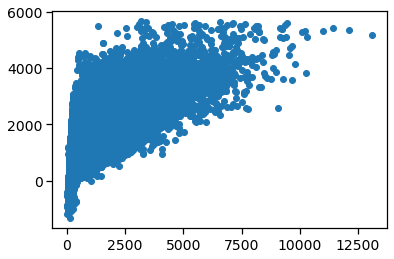

In [58]:
predictions = cross_val_predict(model,X,y,cv=6)
# Plotting the results
plt.scatter(y,predictions)
plt.show()

In [59]:
accuracy = metrics.r2_score(y,predictions)
print("Linear Regression R2 with CV: ",accuracy)

Linear Regression R2 with CV:  0.5016278811958628


In [60]:
rmse = np.sqrt(metrics.mean_squared_error(y,predictions))
print("Linear Regression RMSE with CV:",rmse)

Linear Regression RMSE with CV: 1204.640845171879


In [61]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [62]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = metrics.mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [63]:
kf = KFold(n_splits=10,random_state=1)
kf.get_n_splits(X)

10

In [64]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=False)


In [65]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]
for alpha in alphas:
    train_errors = []
    validation_errors = []
    for train_index,val_index in kf.split(X_train,y_train):
        X_train,X_val = X.iloc[train_index],X.iloc[val_index]
        y_train,y_val = y.iloc[train_index],y.iloc[val_index]

        # Instantiate Model
        lasso_model = Lasso(alpha=alpha,fit_intercept=True,random_state=77)

        #Caculate Errors
        train_error,val_error = calc_metrics(X_train,y_train,X_val,y_val,lasso_model)

        # append to list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    # generate report

    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors),4),
                 round(np.mean(validation_errors),4)))

alpha: 0.0001 | mean(train_error): 1433011.1641 | mean(val_error): 1438148.3452
alpha:  0.001 | mean(train_error): 1424494.5385 | mean(val_error): 1432063.62
alpha:   0.01 | mean(train_error): 1432909.1519 | mean(val_error): 1438705.5161
alpha:    0.1 | mean(train_error): 1434247.8455 | mean(val_error): 1441407.9964
alpha:      1 | mean(train_error): 1436320.3878 | mean(val_error): 1444195.2956
alpha:   10.0 | mean(train_error): 1438310.1095 | mean(val_error): 1445440.1491


In [66]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
predictions = regressor.predict(X_test)
predictions[:5]

array([ 554.6114,  356.8688,  365.5242, 5778.4782, 2356.932 ])

In [67]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,554.6114
2957,356.8688,356.8688
7031,377.5086,365.5242
1084,5778.4782,5778.4782
856,2356.9320,2356.9320


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 573.5954862170088
Mean Squared Error: 1247063.0366334778
Root Mean Squared Error: 1116.7197663843324


In [69]:
rf = RandomForestRegressor(random_state=43)

In [70]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=43)

In [71]:
predictions = rf.predict(X_test)
predictions[:5]

array([ 785.863714,  492.405706,  574.458898, 5292.803732, 2480.03842 ])

In [72]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))
rmse

853.8485654191163

In [73]:
print(metrics.r2_score(y_test,predictions))


0.7317640169688109


In [74]:
results = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
results.head()

,Actual,Predicted
7503,1743.0644,785.863714
2957,356.8688,492.405706
7031,377.5086,574.458898
1084,5778.4782,5292.803732
856,2356.9320,2480.038420
